#Reading map file

In [7]:
import geopandas as gpd

<Axes: >

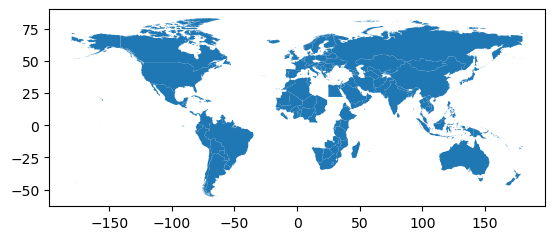

In [9]:
link="https://github.com/Mon-CSS/HW1/raw/refs/heads/main/maps/countriesCIA.gpkg"
Hwlink=gpd.read_file(link)
Hwlink.plot()

Getting the map data to plot

In [10]:
Bestcountries=Hwlink[Hwlink.tobacco_code + Hwlink.alcohol_code + Hwlink.obesity_code ==3]
## or
# countriesCIA[(countriesCIA.tobacco_code==1) & (countriesCIA.alcohol_code==1)] & (countriesCIA.obesity_code==1)

Bestcountries

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,obesity_code,obesity_levels,geometry
4,Armenia,Armenia,Middle East,1,25.5,3.77,1,2.low,3.(15-30],1,2.low,1,2.low,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38..."
16,Bolivia,Bolivia,South America,1,12.7,2.98,1,2.low,2.(5-15],1,2.low,1,2.low,"MULTIPOLYGON (((-62.19884 -20.47139, -62.26945..."
32,Colombia,Colombia,South America,1,8.5,4.09,1,2.low,2.(5-15],1,2.low,1,2.low,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ..."
38,Ecuador,Ecuador,South America,1,11.3,3.05,1,2.low,2.(5-15],1,2.low,1,2.low,"MULTIPOLYGON (((-78.70903 -4.58479, -78.72348 ..."
54,Haiti,Haiti,Central America and the Caribbean,1,7.7,2.85,1,2.low,2.(5-15],1,2.low,1,2.low,"MULTIPOLYGON (((-72.64029 19.98528, -72.69390 ..."
63,Japan,Japan,East and Southeast Asia,0,20.1,8.36,0,1.very low,3.(15-30],3,4.high,0,1.very low,"MULTIPOLYGON (((144.36774 43.95388, 144.41109 ..."
67,Kyrgyzstan,Kyrgyzstan,Central Asia,1,25.4,4.02,1,2.low,3.(15-30],1,2.low,1,2.low,"MULTIPOLYGON (((74.84502 40.50397, 74.83194 40..."
70,Kazakhstan,Kazakhstan,Central Asia,1,23.2,3.73,1,2.low,3.(15-30],1,2.low,1,2.low,"MULTIPOLYGON (((58.56551 45.56996, 58.56055 45..."
71,Laos,Laos,East and Southeast Asia,0,31.8,8.15,0,1.very low,4. (30-40],3,4.high,0,1.very low,"MULTIPOLYGON (((104.25700 17.88763, 104.23943 ..."
77,Lesotho,Lesotho,Africa,1,24.3,3.56,1,2.low,3.(15-30],1,2.low,1,2.low,"MULTIPOLYGON (((29.02250 -29.98984, 28.90639 -..."


Trying to find best countries in world map 

<Axes: >

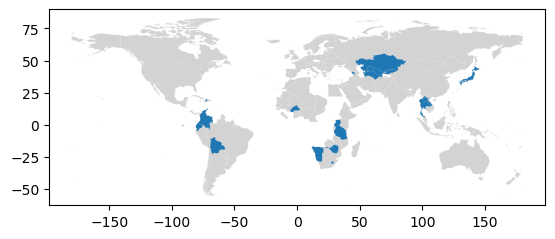

In [15]:
base=Hwlink.plot(color='lightgrey')
Bestcountries.plot(ax=base)

<Axes: >

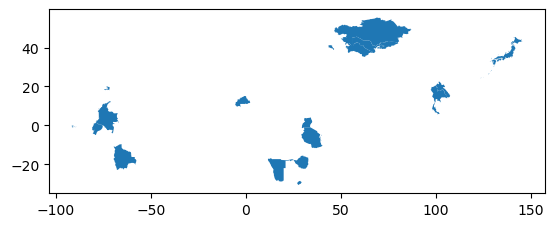

In [17]:
Hwlink[Hwlink.tobacco_code + Hwlink.alcohol_code + Hwlink.obesity_code ==3].plot()

Finding polygons within the rectangles 

<Axes: >

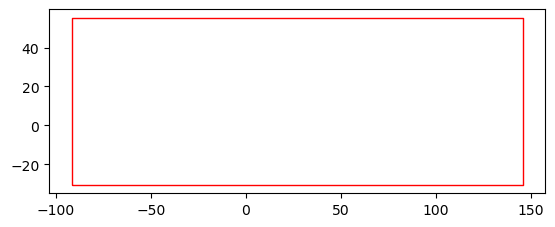

In [19]:
maskToClip=Bestcountries.dissolve().envelope
maskToClip.plot(color='white', edgecolor='red')

Creating new map

In [38]:

import matplotlib.pyplot as plt


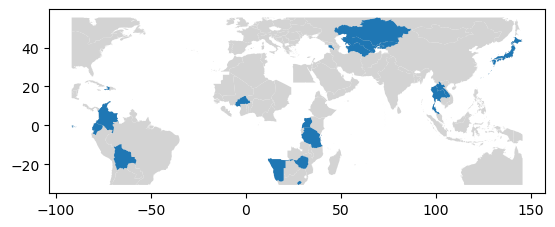

In [40]:
miniworld=Hwlink.clip(maskToClip)
base=miniworld.plot(color='lightgrey')
Bestcountries.plot(ax=base)
plt.show()

Getting the coordinates and names of best countries 

In [42]:
allCoords=[x.coords[:][0] for x in Bestcountries.representative_point()]
allCoords

[(44.847991147548655, 40.07463836669922),
 (-64.18096785447378, -16.290002822875977),
 (-72.5942469254221, 4.118818998336792),
 (-78.27203213562665, -1.7718056440353394),
 (-72.25874769577763, 18.99249839782715),
 (143.33397654084723, 43.47824287414551),
 (75.08457957428467, 41.216819763183594),
 (66.35595848953659, 48.04360771179199),
 (104.69354062964484, 18.2122163772583),
 (28.186213015891937, -29.600107192993164),
 (101.68553614319235, 13.034373760223389),
 (59.044820728251324, 38.96554756164551),
 (34.22659767176289, -6.368194818496704),
 (32.690654032426046, 1.3643054366111755),
 (-1.1899791869300784, 12.237914085388184),
 (63.40268959681407, 41.37894821166992),
 (17.33347331751342, -22.95162868499756),
 (29.34778514867341, -19.008136749267578)]

Creating new columns with new coordinates

In [44]:
Bestcountries=Bestcountries.assign(coordinates=allCoords)
Bestcountries

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,obesity_code,obesity_levels,geometry,coordinates
4,Armenia,Armenia,Middle East,1,25.5,3.77,1,2.low,3.(15-30],1,2.low,1,2.low,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38...","(44.847991147548655, 40.07463836669922)"
16,Bolivia,Bolivia,South America,1,12.7,2.98,1,2.low,2.(5-15],1,2.low,1,2.low,"MULTIPOLYGON (((-62.19884 -20.47139, -62.26945...","(-64.18096785447378, -16.290002822875977)"
32,Colombia,Colombia,South America,1,8.5,4.09,1,2.low,2.(5-15],1,2.low,1,2.low,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ...","(-72.5942469254221, 4.118818998336792)"
38,Ecuador,Ecuador,South America,1,11.3,3.05,1,2.low,2.(5-15],1,2.low,1,2.low,"MULTIPOLYGON (((-78.70903 -4.58479, -78.72348 ...","(-78.27203213562665, -1.7718056440353394)"
54,Haiti,Haiti,Central America and the Caribbean,1,7.7,2.85,1,2.low,2.(5-15],1,2.low,1,2.low,"MULTIPOLYGON (((-72.64029 19.98528, -72.69390 ...","(-72.25874769577763, 18.99249839782715)"
63,Japan,Japan,East and Southeast Asia,0,20.1,8.36,0,1.very low,3.(15-30],3,4.high,0,1.very low,"MULTIPOLYGON (((144.36774 43.95388, 144.41109 ...","(143.33397654084723, 43.47824287414551)"
67,Kyrgyzstan,Kyrgyzstan,Central Asia,1,25.4,4.02,1,2.low,3.(15-30],1,2.low,1,2.low,"MULTIPOLYGON (((74.84502 40.50397, 74.83194 40...","(75.08457957428467, 41.216819763183594)"
70,Kazakhstan,Kazakhstan,Central Asia,1,23.2,3.73,1,2.low,3.(15-30],1,2.low,1,2.low,"MULTIPOLYGON (((58.56551 45.56996, 58.56055 45...","(66.35595848953659, 48.04360771179199)"
71,Laos,Laos,East and Southeast Asia,0,31.8,8.15,0,1.very low,4. (30-40],3,4.high,0,1.very low,"MULTIPOLYGON (((104.25700 17.88763, 104.23943 ...","(104.69354062964484, 18.2122163772583)"
77,Lesotho,Lesotho,Africa,1,24.3,3.56,1,2.low,3.(15-30],1,2.low,1,2.low,"MULTIPOLYGON (((29.02250 -29.98984, 28.90639 -...","(28.186213015891937, -29.600107192993164)"


Plotting non-interactive map

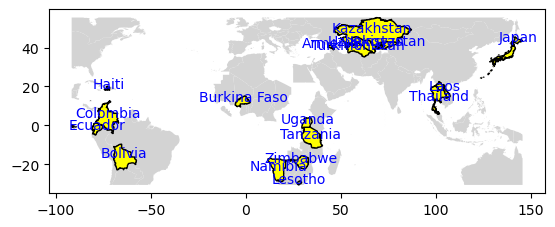

In [46]:
base=miniworld.plot(color='lightgrey')
Bestcountries.plot(color='yellow', edgecolor='black',ax=base)
for idx, row in Bestcountries.iterrows():
   plt.annotate(text=row['name'], xy=row['coordinates'], horizontalalignment='center', color='blue')
